# 📊 Financial Data Analysis using Pandas & NumPy
In this project, we will analyze stock market data for multiple companies, calculate key metrics like daily returns, cumulative returns, and moving averages, and visualize trends and correlations using Python libraries.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot style
plt.style.use('seaborn')

In [3]:
# Define stock tickers
stocks = ['AAPL', 'MSFT', 'GOOG']  # Apple, Microsoft, Google

# Download stock data for 2024
data = yf.download(stocks, start="2024-01-01", end="2025-01-01")['Close']

# Display first 5 rows
print("Stock Prices Data:")
data.head()

C:\Users\chava\AppData\Local\Temp\ipykernel_144\949347041.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2024-01-01", end="2025-01-01")['Close']
[*********************100%***********************]  3 of 3 completed

Stock Prices Data:


Ticker,AAPL,GOOG,MSFT
Date,,,
2024-01-02,184.290405,138.735336,366.707397
2024-01-03,182.910522,139.530609,366.440430
2024-01-04,180.587555,137.224304,363.810272
2024-01-05,179.862839,136.578156,363.622437
2024-01-08,184.210999,139.699600,370.484558


In [4]:
# Check dataset info and missing values
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    252 non-null    float64
 1   GOOG    252 non-null    float64
 2   MSFT    252 non-null    float64
dtypes: float64(3)
memory usage: 7.9 KB
None
Ticker        AAPL        GOOG        MSFT
count   252.000000  252.000000  252.000000
mean    206.272488  164.495619  417.141664
std      25.653529   15.519458   18.093120
min     164.009476  131.776688  363.622437
25%     183.011024  152.585518  406.384178
50%     213.267616  165.679115  415.932144
75%     226.600967  175.809074  426.725990
max     258.396667  197.696884  464.002472


In [5]:
# Calculate daily percentage change
daily_returns = data.pct_change().dropna()
print("Daily Returns:")
daily_returns.head()

Daily Returns:


Ticker,AAPL,GOOG,MSFT
Date,,,
2024-01-03,-0.007488,0.005732,-0.000728
2024-01-04,-0.012700,-0.016529,-0.007178
2024-01-05,-0.004013,-0.004709,-0.000516
2024-01-08,0.024175,0.022855,0.018872
2024-01-09,-0.002263,0.014445,0.002936


In [6]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
print("Cumulative Returns:")
cumulative_returns.head()

Cumulative Returns:


Ticker,AAPL,GOOG,MSFT
Date,,,
2024-01-03,0.992512,1.005732,0.999272
2024-01-04,0.979908,0.989109,0.992100
2024-01-05,0.975975,0.984451,0.991587
2024-01-08,0.999569,1.006950,1.010300
2024-01-09,0.997307,1.021496,1.013266


In [7]:
# Add 20-day and 50-day moving averages for AAPL
data['AAPL_20MA'] = data['AAPL'].rolling(window=20).mean()
data['AAPL_50MA'] = data['AAPL'].rolling(window=50).mean()

In [8]:
# Correlation matrix for daily returns
correlation_matrix = daily_returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Ticker      AAPL      GOOG      MSFT
Ticker                              
AAPL    1.000000  0.362251  0.470472
GOOG    0.362251  1.000000  0.572518
MSFT    0.470472  0.572518  1.000000


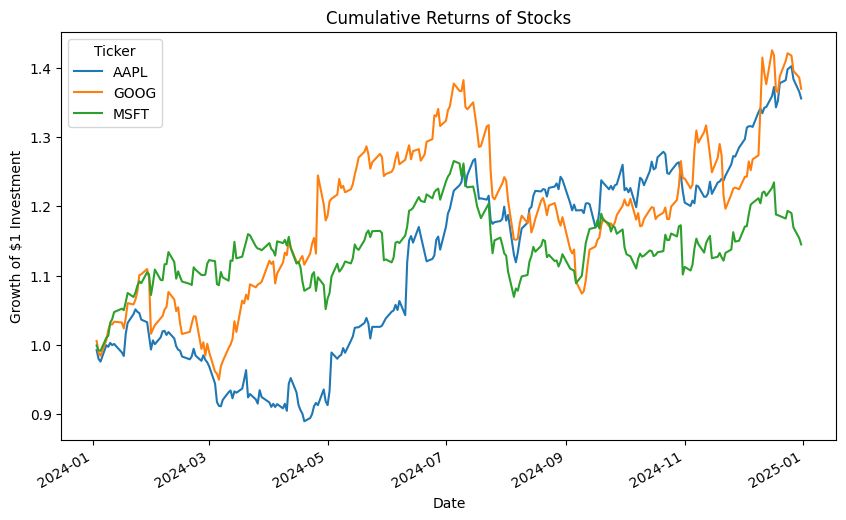

In [9]:
cumulative_returns.plot(figsize=(10,6))
plt.title("Cumulative Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.show()

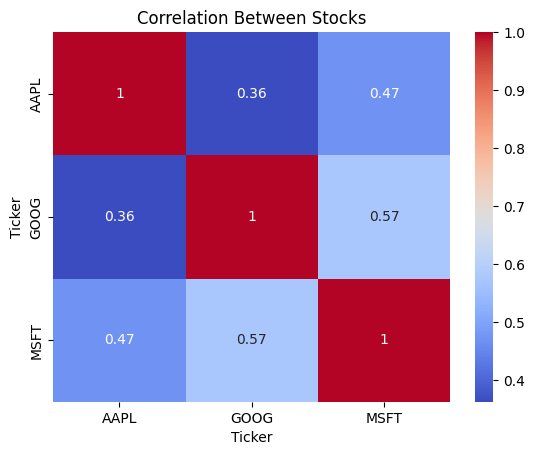

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks")
plt.show()

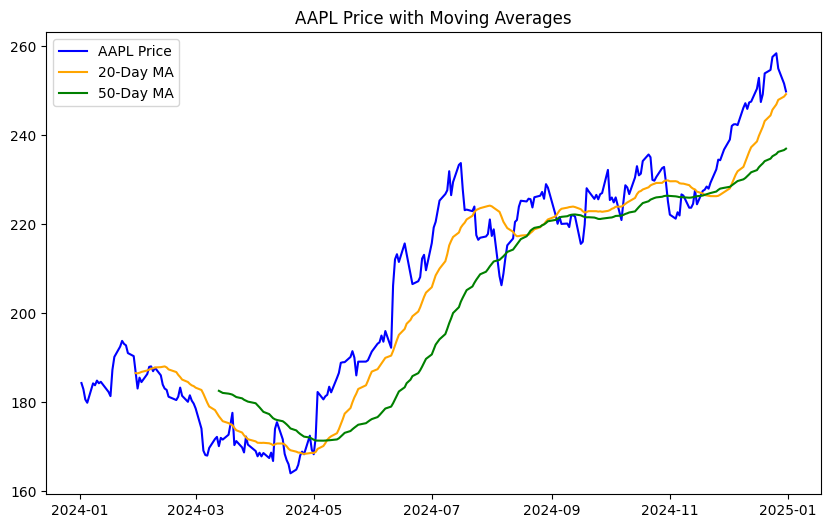

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['AAPL'], label='AAPL Price', color='blue')
plt.plot(data['AAPL_20MA'], label='20-Day MA', color='orange')
plt.plot(data['AAPL_50MA'], label='50-Day MA', color='green')
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.show()

# Key Insights:
1. Which stock had the highest cumulative return?
2. Which stock is the most volatile (based on daily returns)?
3. Which two stocks have the strongest correlation?
   